# Basic cleaning, transormation and feature engineering were made with data
# After some descriptive statistics were made to take a look on data
# The main disadvantage of what have been done is data was not considered as a time series that is way time series techniques was not applied
# As result plotting and analysing of distributions that do not have stationarity is wrong in terms of analysing time series

# rdy_to_stats.xlsx file that do not contain data when nozzles were used creates here

In [1]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from scipy.stats import norm, kstest, shapiro, iqr

In [2]:
# this are periods when 1,2,3,4 HEs were under operation
time_periods = [
    ("2022-09-05","2022-09-05"), ("2022-09-12","2022-09-12"),
    ("2022-10-17","2022-10-17"), ("2022-11-08","2022-11-08"), ("2022-11-15","2022-11-15"),
    ("2022-11-22","2022-11-22"), ("2022-11-29","2022-11-29"), ("2022-12-05","2022-12-05"), 
    ("2022-12-12","2022-12-12"), ("2022-12-19","2022-12-19"), ("2023-01-10","2023-01-10"), 
    ("2023-01-16","2023-01-16"), ("2023-01-24","2023-01-24"), ("2023-01-31","2023-01-31"), 
    ("2023-02-07","2023-02-07"), ("2023-02-13","2023-02-13"), ("2023-02-28","2023-02-28"), 
    ("2023-03-06","2023-03-06"), ("2023-03-09","2023-03-09"), ("2023-03-14","2023-03-14"),
    ("2023-03-27","2023-03-27"), ("2023-04-03","2023-04-03"), ("2023-04-10","2023-04-10"),
]
time_periods2 = [
    ("2021-09-06","2021-09-06"), ("2021-09-13","2021-09-13"), ("2021-09-20","2021-09-20"),
    ("2021-10-04","2021-10-04"), ("2021-10-11","2021-10-11"), ("2021-11-08","2021-11-08"),
    ("2021-11-15","2021-11-15"), ("2021-11-22","2021-11-22"), ("2021-11-29","2021-11-29"),
    ("2021-12-07","2021-12-07"), ("2021-12-13","2021-12-13"), ("2021-12-20","2021-12-20"),
    ("2022-01-18","2022-01-18"), ("2022-01-24","2022-01-24"), ("2022-02-01","2022-02-01"),
    ("2022-02-08","2022-02-08"), ("2022-02-14","2022-02-14"), ("2022-02-24","2022-02-24"),
    ("2022-03-01","2022-03-01"), ("2022-03-15","2022-03-15"), ("2022-03-21","2022-03-21"),
    ("2022-03-29","2022-03-29"), ("2022-04-12","2022-04-12"), ("2022-04-18","2022-04-18"),
    ("2022-05-02","2022-05-02"), ("2022-05-09","2022-05-09"), ("2022-05-16","2022-05-16"),
    ("2022-05-23","2022-05-23"), ("2022-06-07","2022-06-07"), ("2022-06-20","2022-06-20"),
    ("2022-06-28","2022-06-28"),
    
]

time_periods3 = [
    ("2020-10-12","2020-10-12"), ("2020-10-21","2020-10-21"), ("2020-10-28","2020-10-28"),
    ("2020-11-11","2020-11-11"), ("2020-11-16","2020-11-16"), ("2020-11-24","2020-11-24"),
    ("2020-12-03","2020-12-03"), ("2020-12-07","2020-12-07"), ("2020-12-16","2020-12-16"), 
    ("2020-12-24","2020-12-24"), ("2020-12-29","2020-12-29"), ("2021-01-12","2021-01-12"),
    ("2021-01-18","2021-01-18"), ("2021-02-01","2021-02-01"), ("2021-02-08","2021-02-08"),
    ("2021-02-15","2021-02-15"), ("2021-03-01","2021-03-01"), ("2021-03-09","2021-03-09"),
    ("2021-03-15","2021-03-15"), ("2021-03-22","2021-03-22"), ("2021-04-01","2021-04-01"),
    ("2021-04-05","2021-04-05"), ("2021-04-05","2021-04-05"), ("2021-04-12","2021-04-12"),
    ("2021-04-20","2021-04-20"), ("2021-04-26","2021-04-26"), ("2021-05-03","2021-05-03"),
    ("2021-05-11","2021-05-11"), ("2021-05-17","2021-05-17"), ("2021-05-24","2021-05-24"),
    ("2021-05-11","2021-05-11"), ("2021-06-21","2021-06-21"), ("2021-06-28","2021-06-28"),
]

In [3]:
time_periods_all = [*time_periods3, *time_periods2, *time_periods]

### All IDs used
* 299 Т1к после ТО
* 309 Р2контура
* 315 T1k before HE
* 317 Т2к перед ТО
* 319 Т2к после ТО
* 321 T reactor
* 325 Т2к выхТО1
* 327 Твозвуха
* 381 Iвг1
* 395 Iвг2
* 396 Iвг3
* 460 Т2к выхТО2
* 461 Т2к выхТО3
* 462 Т2к выхТО4
* 463 Т2к выхТО5
* 480 Q1k
* 481 Q2контура
#### Second loop I pumps id
* 406 2-1
* 407 2-2
* 408 2-3
* 409 2-4

In [4]:
plt.rcParams.update({'font.size': 14})

In [5]:
sys.path.insert(0, os.path.join(os.path.split(os.path.abspath(""))[0], "app"))

In [6]:
from preprocessing import CsvRefactorer
from analytics import WaterFlowRates
from data_engineering import PeriodicDataPreprocess, FeatureEngineering

In [7]:
# key ids 317, 319, 325, 460, 461, 462, 463, 327
df_refacP1 = CsvRefactorer.read_csv("P1_second_circuit_data_050922_to_210423.csv")
df_refacP2 = CsvRefactorer.read_csv("P2_second_circuit_data_050922_to_210423.csv")

In [8]:
initial_view = df_refacP1.df.loc["2022-10-18", ][df_refacP1.df.loc["2022-10-18", "ID"] == 481]

In [9]:
df_refacP11 = CsvRefactorer.read_csv("P1_second_circuit_data_060921_to_010722.csv")
df_refacP21 = CsvRefactorer.read_csv("P2_second_circuit_data_060921_to_010722.csv")

In [10]:
df_refacP12 = CsvRefactorer.read_csv("P1_second_circuit_data_121020_to_020721.csv")
df_refacP22 = CsvRefactorer.read_csv("P2_second_circuit_data_121020_to_020721.csv")

In [11]:
ids1 = df_refacP1.df["ID"].unique()
ids2 = df_refacP2.df["ID"].unique()

ids11 = df_refacP11.df["ID"].unique()
ids21 = df_refacP21.df["ID"].unique()

ids12 = df_refacP12.df["ID"].unique()
ids22 = df_refacP22.df["ID"].unique()

In [12]:
ids1_array = df_refacP1.select_by_ids(ids1)
ids2_array = df_refacP2.select_by_ids(ids2)

ids11_array = df_refacP11.select_by_ids(ids11)
ids21_array = df_refacP21.select_by_ids(ids21)

ids12_array = df_refacP12.select_by_ids(ids12)
ids22_array = df_refacP22.select_by_ids(ids22)

In [13]:
# freq in minutes
freq = 5

group1 = df_refacP1.min_frac_groupby(freq, *ids1_array)
group2 = df_refacP2.min_frac_groupby(freq, *ids2_array)

group11 = df_refacP11.min_frac_groupby(freq, *ids11_array)
group21 = df_refacP21.min_frac_groupby(freq, *ids21_array)

group12 = df_refacP12.min_frac_groupby(freq, *ids12_array)
group22 = df_refacP22.min_frac_groupby(freq, *ids22_array)

In [14]:
df1 = df_refacP1.concat_dfs(group1)
df2 = df_refacP2.concat_dfs(group2)

df11 = df_refacP11.concat_dfs(group11)
df21 = df_refacP21.concat_dfs(group21)

df12 = df_refacP12.concat_dfs(group12)
df22 = df_refacP22.concat_dfs(group22)

In [15]:
df = pd.concat([df1, df2], axis=1)
df11 = pd.concat([df11, df21], axis=1)
df12 = pd.concat([df12, df22], axis=1)

In [16]:
df = pd.concat([df12, df11, df], axis=0)

In [17]:
df.loc["2022-09"]

,299,309,315,317,319,321,325,327,381,395,396,481,406,407,408,409,460,461,462,463
Timestamp,,,,,,,,,,,,,,,,,,,,
2022-09-05 08:55:00,18.799999,0.01,16.299999,18.0,18.638462,13.584616,18.6,15.414286,NaN,NaN,NaN,NaN,NaN,NaN,0.266839,0.696365,19.079319,19.261005,19.437573,19.333335
2022-09-05 09:00:00,18.799999,0.01,16.299999,18.0,18.600000,13.700000,18.6,16.305000,2.632189,0.098856,NaN,NaN,NaN,1.294112,0.235251,NaN,19.062546,19.264359,19.396028,19.301875
2022-09-05 09:05:00,18.799999,0.01,16.299999,18.0,18.600000,13.742857,18.6,16.313333,NaN,NaN,NaN,NaN,NaN,NaN,0.234406,NaN,19.054907,19.269079,19.373930,19.286272
2022-09-05 09:10:00,18.799999,0.01,16.299999,18.0,18.600000,13.765000,18.6,17.545000,NaN,NaN,NaN,NaN,NaN,NaN,0.227990,NaN,19.049689,19.273303,19.360886,19.275539
2022-09-05 09:15:00,18.799999,0.01,16.299999,18.0,18.600000,13.800000,18.6,19.345000,NaN,NaN,NaN,NaN,NaN,NaN,0.204643,NaN,19.050136,19.273079,19.355594,19.270254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30 23:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-30 23:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-30 23:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


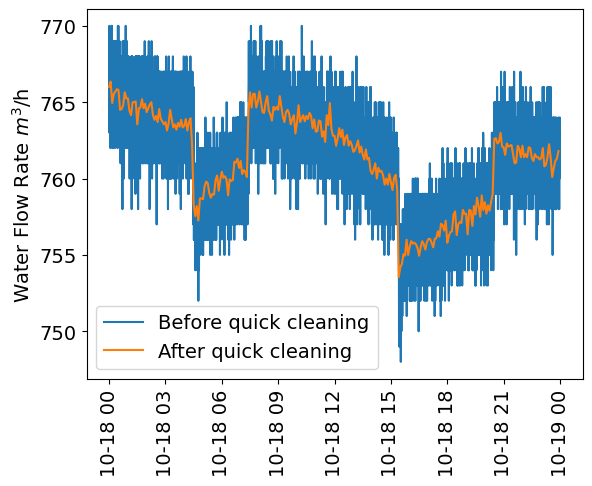

In [18]:

plt.plot(initial_view["Value"], label="Before quick cleaning")
plt.plot(df.loc["2022-10-18", 481], label="After quick cleaning")
plt.ylabel("Water Flow Rate $m^3$/h")
plt.xticks(rotation=90)
plt.legend()

In [19]:
df = df.rename(columns=df_refacP1.IDS_MAP)

In [20]:
df.loc["2020-10-22"]

,T1aHE,P2,T1bHE,T2bHE,T2aHE,Treactor,T2aHE1,Tair,CTF1,CTF2,CTF3,Q2,p21,p22,p23,p24,T2aHE2,T2aHE3,T2aHE4,T2aHE5
Timestamp,,,,,,,,,,,,,,,,,,,,
2020-10-22 00:00:00,39.968750,0.4,45.700000,25.849999,31.752941,43.260000,32.268750,11.683333,NaN,74.834709,0.081483,661.60,NaN,145.950532,87.808146,97.952647,31.991565,32.620366,30.826537,31.062896
2020-10-22 00:05:00,40.068749,0.4,45.799999,25.950000,31.849999,43.320000,32.350000,11.468750,NaN,74.704123,NaN,662.80,NaN,145.798701,87.935183,98.110906,32.086823,32.721663,30.922913,31.160168
2020-10-22 00:10:00,40.168750,0.4,45.868751,26.068750,31.968750,43.325001,32.468750,11.336842,NaN,74.600935,NaN,660.85,3.703270,145.672644,87.972934,98.274015,32.201984,32.837718,31.043218,31.280249
2020-10-22 00:15:00,40.250000,0.4,45.950001,26.168751,32.068749,43.447369,32.568749,11.200000,1.498003,74.544744,NaN,660.65,NaN,145.469037,88.067533,98.433785,32.303506,32.944158,31.144738,31.381323
2020-10-22 00:20:00,40.350000,0.4,46.031250,26.287499,32.168750,43.510526,32.668750,11.072222,NaN,74.674723,1.199064,662.00,NaN,145.482904,87.803111,98.083501,32.403791,33.045679,31.246648,31.484620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-22 23:35:00,38.382354,0.4,44.650000,22.436842,29.000000,42.534999,29.687501,5.000000,NaN,74.967650,92.765560,655.30,NaN,146.083955,87.983347,97.412027,29.343529,29.973972,27.979486,28.246257
2020-10-22 23:40:00,38.299999,0.4,44.599998,22.422222,29.000000,42.494737,29.623530,5.000000,NaN,74.868448,92.767026,655.40,2.647857,145.964399,87.927159,97.462529,29.312975,29.939434,27.949072,28.216069
2020-10-22 23:45:00,38.287499,0.4,44.576469,22.323529,28.912500,42.489474,29.587500,5.000000,NaN,74.871687,92.716835,655.45,NaN,145.900218,88.049525,97.500945,29.241185,29.871070,27.870585,28.134002


In [21]:
df = df.reindex(sorted(df.columns), axis=1)

In [22]:
df = df[df["Q2"] > 500]

In [46]:
periods_all = df_refacP1.select_time_period(df, time_periods_all)
periods_all

{'2020-10-12 2020-10-12':                          CTF1      CTF2      CTF3        P2      Q2  \
 Timestamp                                                             
 2020-10-12 19:40:00  3.316712  4.507393  0.000000  0.377778  706.15   
 2020-10-12 19:45:00  0.000000  0.000000  3.957233  0.386000  733.50   
 2020-10-12 19:50:00  0.000000  0.002161  2.970827  0.385000  733.55   
 2020-10-12 19:55:00  0.000000  4.554701  2.268247  0.384000  731.35   
 2020-10-12 20:00:00  3.291631  0.000000  4.657511  0.387000  730.10   
 2020-10-12 20:05:00  0.000000  0.023769  4.358241  0.387000  730.40   
 2020-10-12 20:10:00  3.181520  0.000000  4.589462  0.385500  728.25   
 2020-10-12 20:15:00  0.000000  0.002161  0.000000  0.385500  728.40   
 2020-10-12 20:20:00  0.000000  4.438248  3.770064  0.382778  729.05   
 2020-10-12 20:25:00  0.000000  1.816052  0.000000  0.383500  728.85   
 2020-10-12 20:30:00  2.790496  1.413148  3.908799  0.383158  728.10   
 2020-10-12 20:35:00  0.000000  3.38361

In [64]:
pdp = PeriodicDataPreprocess(periods_all.copy())

In [65]:
pdp.conditional_rows_drop(["p21", "p22", "p23", "p24"], "eq", 0.0)

{'2020-10-12 2020-10-12':                          CTF1      CTF2      CTF3        P2      Q2  \
 Timestamp                                                             
 2020-10-12 19:40:00  3.316712  4.507393  0.000000  0.377778  706.15   
 2020-10-12 19:45:00  0.000000  0.000000  3.957233  0.386000  733.50   
 2020-10-12 19:50:00  0.000000  0.002161  2.970827  0.385000  733.55   
 2020-10-12 19:55:00  0.000000  4.554701  2.268247  0.384000  731.35   
 2020-10-12 20:00:00  3.291631  0.000000  4.657511  0.387000  730.10   
 2020-10-12 20:05:00  0.000000  0.023769  4.358241  0.387000  730.40   
 2020-10-12 20:10:00  3.181520  0.000000  4.589462  0.385500  728.25   
 2020-10-12 20:15:00  0.000000  0.002161  0.000000  0.385500  728.40   
 2020-10-12 20:20:00  0.000000  4.438248  3.770064  0.382778  729.05   
 2020-10-12 20:25:00  0.000000  1.816052  0.000000  0.383500  728.85   
 2020-10-12 20:30:00  2.790496  1.413148  3.908799  0.383158  728.10   
 2020-10-12 20:35:00  0.000000  3.38361

In [66]:
to_del = []
for i in pdp.period_keys:
    pdp.period[i] = pdp.period[i][pdp.period[i]["Q2"] >= pdp.period[i]["Q2"].mean()]
#     pdp.period[i] = pdp.period[i][((pdp.period[i]["T1bHE"] - pdp.period[i]["T1aHE"]) > 2.0) & ((pdp.period[i]["T1bHE"] - pdp.period[i]["T1aHE"]) < 4)]
    if len(pdp.period[i]) == 0:
        to_del.append(i)

In [67]:
for i in to_del:
    del pdp.period[i]
pdp._period_keys = pdp.period.keys()

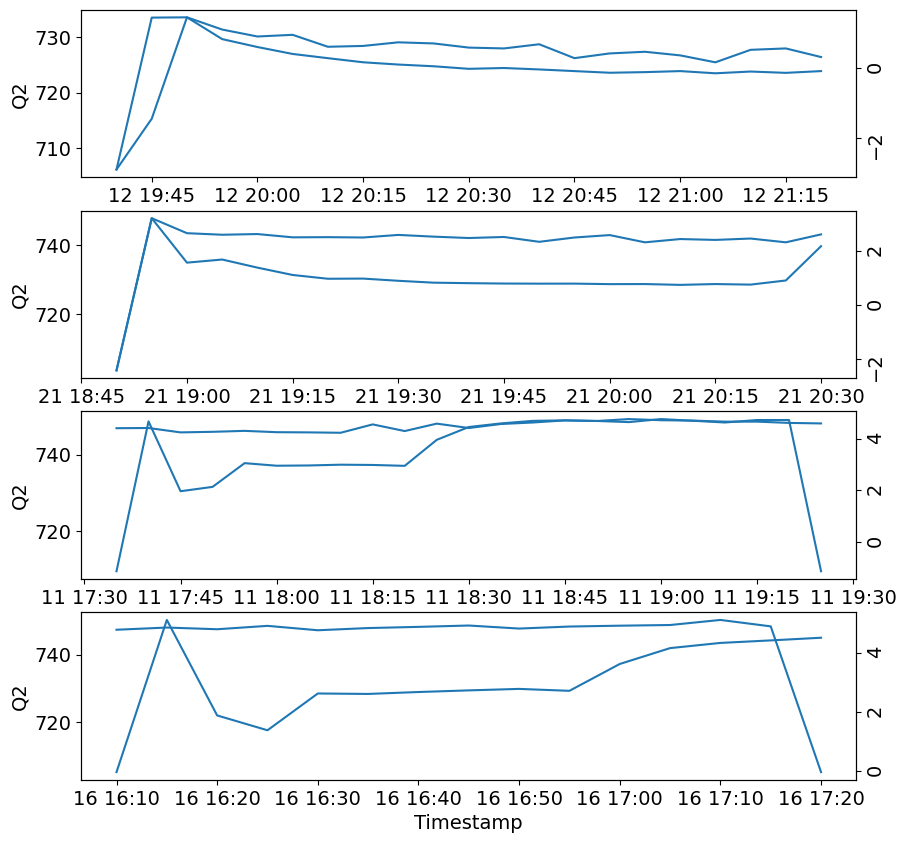

In [68]:
steps = 4
fig, axs = plt.subplots(steps,1, figsize=(10,10))
for i in range(steps):
    ax1 = axs[i].twinx()
    sns.lineplot(
        pdp.period[list(pdp.period_keys)[i]]["Q2"],
        ax=axs[i]
    )
    sns.lineplot(
        pdp.period[list(pdp.period_keys)[i]]["T1bHE"] - pdp.period[list(pdp.period_keys)[i]]["T1aHE"],
        ax=ax1
    )
    ax1.tick_params(rotation=90)

In [62]:
means = []
dates = []
for i in pdp.period.values():
    means.append(i["Q2"].mean())
    dates.append(i.index[0])

(array([18536., 18628., 18718., 18809., 18901., 18993., 19083., 19174.,
        19266., 19358., 19448.]),
 [Text(18536.0, 0, '2020-10'),
  Text(18628.0, 0, '2021-01'),
  Text(18718.0, 0, '2021-04'),
  Text(18809.0, 0, '2021-07'),
  Text(18901.0, 0, '2021-10'),
  Text(18993.0, 0, '2022-01'),
  Text(19083.0, 0, '2022-04'),
  Text(19174.0, 0, '2022-07'),
  Text(19266.0, 0, '2022-10'),
  Text(19358.0, 0, '2023-01'),
  Text(19448.0, 0, '2023-04')])

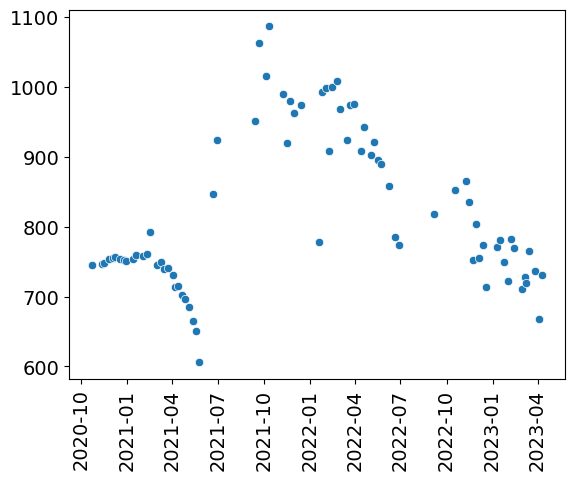

In [63]:
sns.scatterplot(x=dates, y=means)
plt.xticks(rotation=90)

In [41]:
pdp.sma_smoothing(num_points=10)

{'2020-10-12 2020-10-12':                          CTF1      CTF2      CTF3        P2       Q2  \
 Timestamp                                                              
 2020-10-12 19:40:00  0.978986  1.534448  2.657159  0.384406  727.960   
 2020-10-12 19:45:00  0.926365  1.225024  3.048038  0.384944  730.155   
 2020-10-12 19:50:00  0.926365  1.563385  2.822210  0.384406  729.600   
 2020-10-12 19:55:00  1.287598  1.563385  2.525127  0.384222  729.115   
 2020-10-12 20:00:00  1.287598  1.454056  2.519408  0.383884  728.600   
 2020-10-12 20:05:00  1.322560  1.882972  2.445858  0.383302  728.295   
 2020-10-12 20:10:00  1.322560  2.297605  2.012456  0.382720  727.990   
 2020-10-12 20:15:00  1.336096  2.297605  1.553510  0.382287  727.835   
 2020-10-12 20:20:00  1.336096  2.297389  1.559456  0.381737  727.540   
 2020-10-12 20:25:00  1.567545  2.214829  1.182450  0.381460  727.405   
 2020-10-12 20:30:00  1.567545  2.438369  1.413606  0.381172  727.315   
 
                        

In [42]:
pdp.pumps_mapping(columns=["p21", "p22", "p23", "p24"], drop_pumps=False)

['p21', 'p22', 'p23', 'p24']


{'2020-10-12 2020-10-12':                          CTF1      CTF2      CTF3        P2       Q2  \
 Timestamp                                                              
 2020-10-12 19:40:00  0.978986  1.534448  2.657159  0.384406  727.960   
 2020-10-12 19:45:00  0.926365  1.225024  3.048038  0.384944  730.155   
 2020-10-12 19:50:00  0.926365  1.563385  2.822210  0.384406  729.600   
 2020-10-12 19:55:00  1.287598  1.563385  2.525127  0.384222  729.115   
 2020-10-12 20:00:00  1.287598  1.454056  2.519408  0.383884  728.600   
 2020-10-12 20:05:00  1.322560  1.882972  2.445858  0.383302  728.295   
 2020-10-12 20:10:00  1.322560  2.297605  2.012456  0.382720  727.990   
 2020-10-12 20:15:00  1.336096  2.297605  1.553510  0.382287  727.835   
 2020-10-12 20:20:00  1.336096  2.297389  1.559456  0.381737  727.540   
 2020-10-12 20:25:00  1.567545  2.214829  1.182450  0.381460  727.405   
 2020-10-12 20:30:00  1.567545  2.438369  1.413606  0.381172  727.315   
 
                        

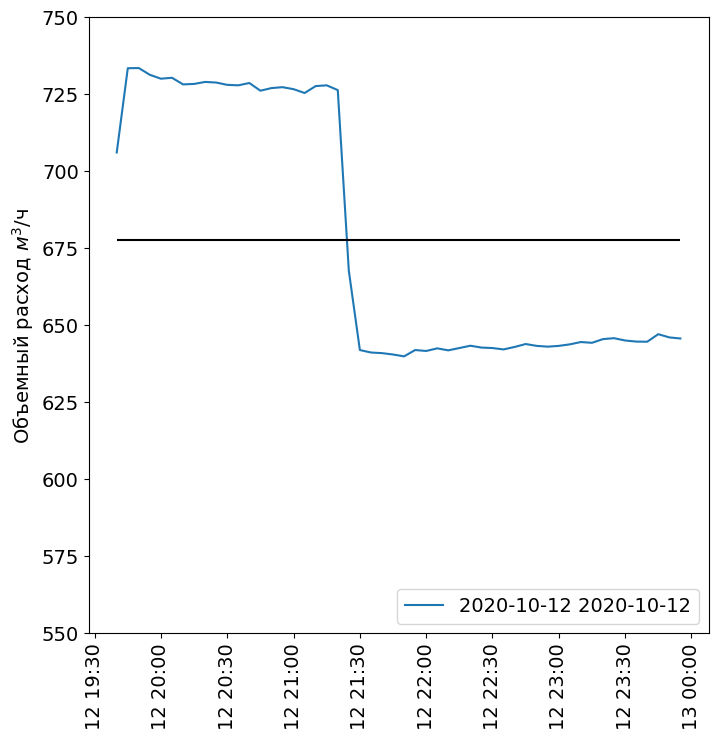

In [44]:
# plot Q2 for some weeks before zscore filtering

plt.figure(figsize=(8,8))
weeks = list(pdp.period_keys)[:1]
for i in weeks:
    plt.plot(periods_all[i]["Q2"], label=i)
    plt.hlines(
        periods_all[i]["Q2"].mean(),
        periods_all[i]["Q2"].index[0],
        periods_all[i]["Q2"].index[-1],
        color="black",
        
)

# plt.ylabel("Water Flow Rate $m^3$/h")
plt.ylabel("Объемный расход $м^3$/ч")
plt.ylim(550, 750)
plt.xticks(rotation=90)
plt.legend(loc='lower right')

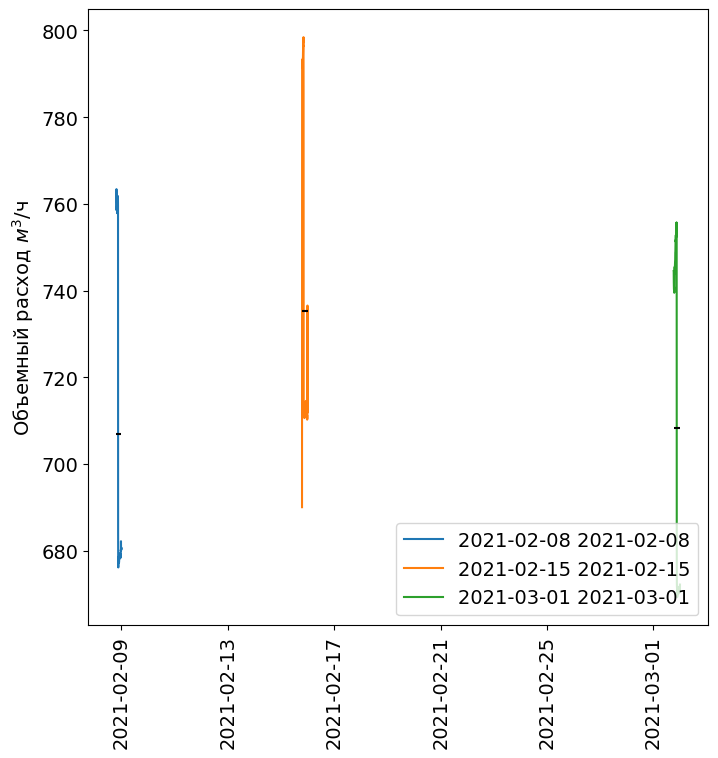

In [45]:
# plot Q2 for some weeks before zscore filtering
plt.figure(figsize=(8,8))
weeks = list(pdp.period_keys)[13:16]
for i in weeks:
    plt.plot(periods_all[i]["Q2"], label=i)
    plt.hlines(
        periods_all[i]["Q2"].mean(),
        periods_all[i]["Q2"].index[0],
        periods_all[i]["Q2"].index[-1],
        color="black",
#         label="среднее"
        
)
# plt.ylim(400, 950)
# plt.ylabel("Water Flow Rate $m^3$/h")
plt.ylabel("Объемный расход $м^3$/ч")
plt.xticks(rotation=90)
plt.legend(loc='lower right')

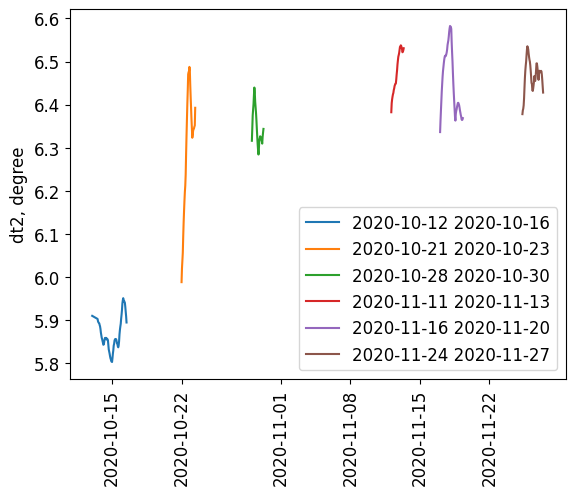

In [136]:
## dt2 has high bias so lets check how Q2 filtering fixed it
# plot dt for some weeks
# is there an urge to filter data one more time but now by dt?
weeks = list(pdp.period_keys)[:6]
for i in weeks:
    plt.plot(
        pdp.period[i]["dt2"], 
        label=i)

plt.ylabel("dt2, degree")
plt.xticks(rotation=90)
plt.legend()

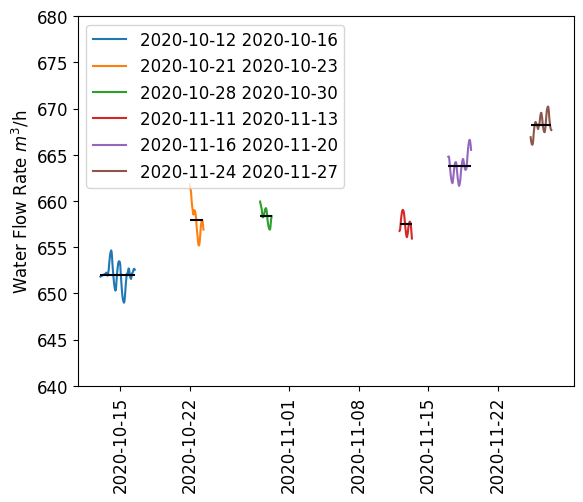

In [137]:
# plot Q2 for some weeks
weeks = list(pdp.period_keys)[:6]
for i in weeks:
    plt.plot(pdp.period[i]["Q2"], label=i)
    plt.hlines(
        pdp.period[i]["Q2"].mean(),
        pdp.period[i]["Q2"].index[0],
        pdp.period[i]["Q2"].index[-1],
        color="black"
        
)
plt.ylim(640,680)
plt.ylabel("Water Flow Rate $m^3$/h")
plt.xticks(rotation=90)
plt.legend()

Text(0.5, 0, 'Объемный расход, $м^3$/ч')

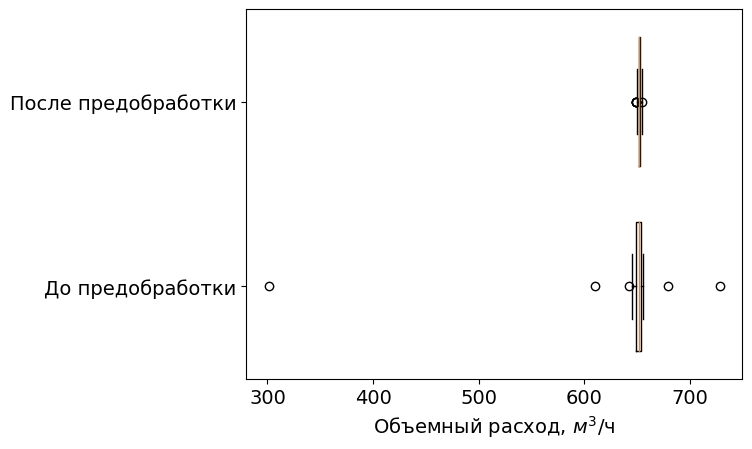

In [138]:
plt.rcParams.update({'font.size': 14})

# before filtering
plt.boxplot(
    labels=["До предобработки", "После предобработки"],
    x = [
        periods_all["2020-10-12 2020-10-16"]["Q2"][periods_all["2020-10-12 2020-10-16"]["Q2"] > 200],
        pdp.period["2020-10-12 2020-10-16"]["Q2"][pdp.period["2020-10-12 2020-10-16"]["Q2"] > 200]
    ],
    vert=False,
    widths=0.7
    
)
plt.xlabel("Объемный расход, $м^3$/ч")
# plt.boxplot(
#     pdp.period["2020-10-12 2020-10-16"]["Q2"][pdp.period["2020-10-12 2020-10-16"]["Q2"] > 200],
#     vert=False,
#     labels=["Water FLow Rate After"]
# )

In [139]:
df = pdp.to_dataframe()
df

,CTF1,CTF2,CTF3,P2,Q2,T1aHE,T1bHE,T2aHE,T2aHE1,T2aHE2,...,T2bHE,Tair,Treactor,p21,p22,p23,p24,dt1,dt2,pumps2
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-10-13 00:00:00,10.391642,75.536672,2.366792,0.400037,651.812917,41.489093,47.106167,33.441085,33.984650,33.655208,...,27.530647,6.704512,46.675417,2.027749,145.565675,87.493817,94.888844,5.617074,5.910438,234
2020-10-13 13:00:00,1.769823,75.148147,2.332297,0.400000,652.146667,41.521119,47.103154,33.504863,34.047193,33.710372,...,27.601600,6.631041,46.800432,2.078860,145.521144,87.509749,94.877725,5.582035,5.903263,234
2020-10-13 14:00:00,1.645218,75.190566,2.289487,0.400000,652.247083,41.665119,47.228287,33.671215,34.209205,33.871750,...,27.773236,6.405955,46.922489,2.047673,145.601967,87.545326,94.866934,5.563168,5.897979,234
2020-10-13 15:00:00,1.720101,75.288327,2.248732,0.400000,652.162500,41.688156,47.239838,33.707642,34.244415,33.906022,...,27.812119,6.144858,46.944957,1.946019,145.730676,87.543530,94.789916,5.551682,5.895524,234
2020-10-13 16:00:00,1.709977,75.429964,2.264559,0.400000,651.994167,41.639971,47.186255,33.663756,34.202676,33.862954,...,27.769766,5.829155,46.902795,1.984860,145.865957,87.565692,94.723563,5.546284,5.893990,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-13 20:00:00,46.293973,79.489833,1.784246,0.479764,652.115417,41.822770,48.098035,30.721970,30.608374,30.487190,...,24.876825,2.164719,42.880856,145.501706,140.349103,141.447866,1.721029,6.275265,5.845145,123
2023-04-13 21:00:00,37.239074,79.488435,1.687247,0.479764,652.040000,41.489754,47.771044,30.350031,30.243953,30.117627,...,24.506555,1.381543,42.547088,145.725531,140.590839,141.577473,1.765666,6.281291,5.843476,123
2023-04-13 22:00:00,28.394498,79.511639,1.731881,0.479781,652.057500,41.371228,47.641331,30.249506,30.146111,30.018694,...,24.422053,0.596239,42.411509,145.945769,140.825005,141.642128,1.740993,6.270103,5.827453,123


In [140]:
fe = FeatureEngineering(df)

In [141]:
fe.df

,CTF1,CTF2,CTF3,P2,Q2,T1aHE,T1bHE,T2aHE,T2aHE1,T2aHE2,...,Treactor,p21,p22,p23,p24,dt1,dt2,pumps2,dt_circuits_coef,dt_circuits_coef_delta
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-10-13 00:00:00,10.391642,75.536672,2.366792,0.400037,651.812917,41.489093,47.106167,33.441085,33.984650,33.655208,...,46.675417,2.027749,145.565675,87.493817,94.888844,5.617074,5.910438,234,1.711045,19.575520
2020-10-13 13:00:00,1.769823,75.148147,2.332297,0.400000,652.146667,41.521119,47.103154,33.504863,34.047193,33.710372,...,46.800432,2.078860,145.521144,87.509749,94.877725,5.582035,5.903263,234,1.706537,19.501554
2020-10-13 14:00:00,1.645218,75.190566,2.289487,0.400000,652.247083,41.665119,47.228287,33.671215,34.209205,33.871750,...,46.922489,2.047673,145.601967,87.545326,94.866934,5.563168,5.897979,234,1.700496,19.455052
2020-10-13 15:00:00,1.720101,75.288327,2.248732,0.400000,652.162500,41.688156,47.239838,33.707642,34.244415,33.906022,...,46.944957,1.946019,145.730676,87.543530,94.789916,5.551682,5.895524,234,1.698534,19.427719
2020-10-13 16:00:00,1.709977,75.429964,2.264559,0.400000,651.994167,41.639971,47.186255,33.663756,34.202676,33.862954,...,46.902795,1.984860,145.865957,87.565692,94.723563,5.546284,5.893990,234,1.699195,19.416490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-13 20:00:00,46.293973,79.489833,1.784246,0.479764,652.115417,41.822770,48.098035,30.721970,30.608374,30.487190,...,42.880856,145.501706,140.349103,141.447866,1.721029,6.275265,5.845145,123,1.933448,23.221211
2023-04-13 21:00:00,37.239074,79.488435,1.687247,0.479764,652.040000,41.489754,47.771044,30.350031,30.243953,30.117627,...,42.547088,145.725531,140.590839,141.577473,1.765666,6.281291,5.843476,123,1.949317,23.264490
2023-04-13 22:00:00,28.394498,79.511639,1.731881,0.479781,652.057500,41.371228,47.641331,30.249506,30.146111,30.018694,...,42.411509,145.945769,140.825005,141.642128,1.740993,6.270103,5.827453,123,1.950750,23.219278


In [142]:
# makes new feature from passed columns
# if omitbelow is given excludes column from averaging
fe.columns_averaging(columns=["p21", "p22", "p23", "p24"], omitbelow=50, feature_name="I2mean")


['p21', 'p22', 'p23', 'p24']


,CTF1,CTF2,CTF3,P2,Q2,T1aHE,T1bHE,T2aHE,T2aHE1,T2aHE2,...,p21,p22,p23,p24,dt1,dt2,pumps2,dt_circuits_coef,dt_circuits_coef_delta,I2mean
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-10-13 00:00:00,10.391642,75.536672,2.366792,0.400037,651.812917,41.489093,47.106167,33.441085,33.984650,33.655208,...,2.027749,145.565675,87.493817,94.888844,5.617074,5.910438,234,1.711045,19.575520,109.316112
2020-10-13 13:00:00,1.769823,75.148147,2.332297,0.400000,652.146667,41.521119,47.103154,33.504863,34.047193,33.710372,...,2.078860,145.521144,87.509749,94.877725,5.582035,5.903263,234,1.706537,19.501554,109.302873
2020-10-13 14:00:00,1.645218,75.190566,2.289487,0.400000,652.247083,41.665119,47.228287,33.671215,34.209205,33.871750,...,2.047673,145.601967,87.545326,94.866934,5.563168,5.897979,234,1.700496,19.455052,109.338076
2020-10-13 15:00:00,1.720101,75.288327,2.248732,0.400000,652.162500,41.688156,47.239838,33.707642,34.244415,33.906022,...,1.946019,145.730676,87.543530,94.789916,5.551682,5.895524,234,1.698534,19.427719,109.354707
2020-10-13 16:00:00,1.709977,75.429964,2.264559,0.400000,651.994167,41.639971,47.186255,33.663756,34.202676,33.862954,...,1.984860,145.865957,87.565692,94.723563,5.546284,5.893990,234,1.699195,19.416490,109.385071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-13 20:00:00,46.293973,79.489833,1.784246,0.479764,652.115417,41.822770,48.098035,30.721970,30.608374,30.487190,...,145.501706,140.349103,141.447866,1.721029,6.275265,5.845145,123,1.933448,23.221211,142.432891
2023-04-13 21:00:00,37.239074,79.488435,1.687247,0.479764,652.040000,41.489754,47.771044,30.350031,30.243953,30.117627,...,145.725531,140.590839,141.577473,1.765666,6.281291,5.843476,123,1.949317,23.264490,142.631281
2023-04-13 22:00:00,28.394498,79.511639,1.731881,0.479781,652.057500,41.371228,47.641331,30.249506,30.146111,30.018694,...,145.945769,140.825005,141.642128,1.740993,6.270103,5.827453,123,1.950750,23.219278,142.804301


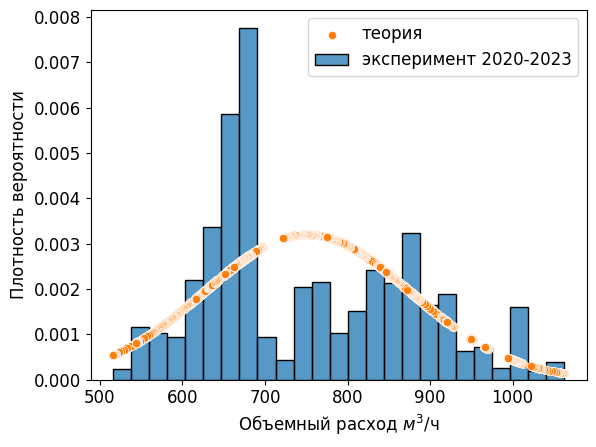

In [143]:
plt.rcParams.update({'font.size': 12})
sns.histplot(df.loc[:, "Q2"], stat="density", label="эксперимент 2020-2023")
mu, sigma = norm.fit(df.loc[:, "Q2"])
nrm = norm(mu, sigma).pdf(df.loc[:, "Q2"])
sns.scatterplot(x=df.loc[:, "Q2"], y=nrm, label="теория")

plt.ylabel("Плотность вероятности")
plt.xlabel("Объемный расход $м^3$/ч")
plt.legend()

ShapiroResult(statistic=0.970400869846344, pvalue=0.005318068899214268)

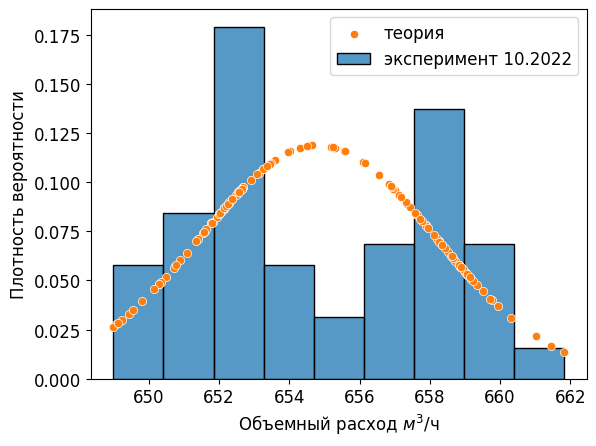

In [144]:
sns.histplot(df.loc["2020-10", "Q2"], stat="density", label="эксперимент 10.2022")
mu, sigma = norm.fit(fe.df.loc["2020-10", "Q2"])
nrm = norm(mu, sigma).pdf(fe.df.loc["2020-10", "Q2"])
sns.scatterplot(x=fe.df.loc["2020-10", "Q2"], y=nrm, label="теория")


plt.ylabel("Плотность вероятности")
plt.xlabel("Объемный расход $м^3$/ч")

scipy.stats.shapiro(nrm)

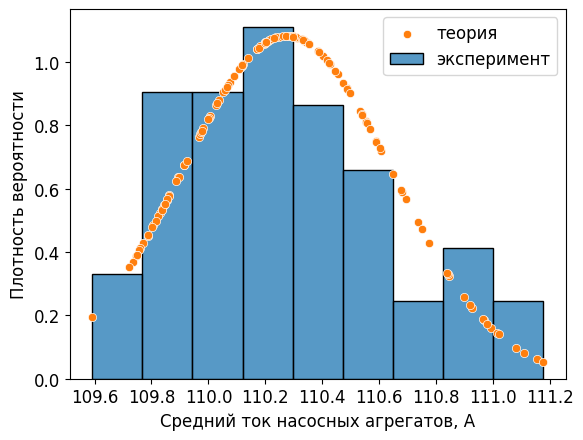

In [145]:
sns.histplot(fe.df.loc["2020-11", "I2mean"], stat="density", label="эксперимент")
mu, sigma = norm.fit(fe.df.loc["2020-11", "I2mean"])
nrm = norm(mu, sigma).pdf(fe.df.loc["2020-11", "I2mean"])
sns.scatterplot(x=fe.df.loc["2020-11", "I2mean"], y=nrm, label="теория")
plt.ylabel("Плотность вероятности")
plt.xlabel("Средний ток насосных агрегатов, А")
plt.legend()

In [146]:
fe.columns_categorizing(
    columns=["CTF1", "CTF2", "CTF3"],
    value=50,
    i=1,
    e=0,
    operator="gt"
)

,CTF1,CTF2,CTF3,P2,Q2,T1aHE,T1bHE,T2aHE,T2aHE1,T2aHE2,...,p21,p22,p23,p24,dt1,dt2,pumps2,dt_circuits_coef,dt_circuits_coef_delta,I2mean
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-10-13 00:00:00,0,1,0,0.400037,651.812917,41.489093,47.106167,33.441085,33.984650,33.655208,...,2.027749,145.565675,87.493817,94.888844,5.617074,5.910438,234,1.711045,19.575520,109.316112
2020-10-13 13:00:00,0,1,0,0.400000,652.146667,41.521119,47.103154,33.504863,34.047193,33.710372,...,2.078860,145.521144,87.509749,94.877725,5.582035,5.903263,234,1.706537,19.501554,109.302873
2020-10-13 14:00:00,0,1,0,0.400000,652.247083,41.665119,47.228287,33.671215,34.209205,33.871750,...,2.047673,145.601967,87.545326,94.866934,5.563168,5.897979,234,1.700496,19.455052,109.338076
2020-10-13 15:00:00,0,1,0,0.400000,652.162500,41.688156,47.239838,33.707642,34.244415,33.906022,...,1.946019,145.730676,87.543530,94.789916,5.551682,5.895524,234,1.698534,19.427719,109.354707
2020-10-13 16:00:00,0,1,0,0.400000,651.994167,41.639971,47.186255,33.663756,34.202676,33.862954,...,1.984860,145.865957,87.565692,94.723563,5.546284,5.893990,234,1.699195,19.416490,109.385071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-13 20:00:00,0,1,0,0.479764,652.115417,41.822770,48.098035,30.721970,30.608374,30.487190,...,145.501706,140.349103,141.447866,1.721029,6.275265,5.845145,123,1.933448,23.221211,142.432891
2023-04-13 21:00:00,0,1,0,0.479764,652.040000,41.489754,47.771044,30.350031,30.243953,30.117627,...,145.725531,140.590839,141.577473,1.765666,6.281291,5.843476,123,1.949317,23.264490,142.631281
2023-04-13 22:00:00,0,1,0,0.479781,652.057500,41.371228,47.641331,30.249506,30.146111,30.018694,...,145.945769,140.825005,141.642128,1.740993,6.270103,5.827453,123,1.950750,23.219278,142.804301


In [147]:
fe.make_QbyIP()

,CTF1,CTF2,CTF3,P2,Q2,T1aHE,T1bHE,T2aHE,T2aHE1,T2aHE2,...,p22,p23,p24,dt1,dt2,pumps2,dt_circuits_coef,dt_circuits_coef_delta,I2mean,QbyIP
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-10-13 00:00:00,0,1,0,0.400037,651.812917,41.489093,47.106167,33.441085,33.984650,33.655208,...,145.565675,87.493817,94.888844,5.617074,5.910438,234,1.711045,19.575520,109.316112,14.905212
2020-10-13 13:00:00,0,1,0,0.400000,652.146667,41.521119,47.103154,33.504863,34.047193,33.710372,...,145.521144,87.509749,94.877725,5.582035,5.903263,234,1.706537,19.501554,109.302873,14.916046
2020-10-13 14:00:00,0,1,0,0.400000,652.247083,41.665119,47.228287,33.671215,34.209205,33.871750,...,145.601967,87.545326,94.866934,5.563168,5.897979,234,1.700496,19.455052,109.338076,14.913539
2020-10-13 15:00:00,0,1,0,0.400000,652.162500,41.688156,47.239838,33.707642,34.244415,33.906022,...,145.730676,87.543530,94.789916,5.551682,5.895524,234,1.698534,19.427719,109.354707,14.909337
2020-10-13 16:00:00,0,1,0,0.400000,651.994167,41.639971,47.186255,33.663756,34.202676,33.862954,...,145.865957,87.565692,94.723563,5.546284,5.893990,234,1.699195,19.416490,109.385071,14.901352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-13 20:00:00,0,1,0,0.479764,652.115417,41.822770,48.098035,30.721970,30.608374,30.487190,...,140.349103,141.447866,1.721029,6.275265,5.845145,123,1.933448,23.221211,142.432891,9.543027
2023-04-13 21:00:00,0,1,0,0.479764,652.040000,41.489754,47.771044,30.350031,30.243953,30.117627,...,140.590839,141.577473,1.765666,6.281291,5.843476,123,1.949317,23.264490,142.631281,9.528651
2023-04-13 22:00:00,0,1,0,0.479781,652.057500,41.371228,47.641331,30.249506,30.146111,30.018694,...,140.825005,141.642128,1.740993,6.270103,5.827453,123,1.950750,23.219278,142.804301,9.517031


In [148]:
fe.make_dts_on_HEs()

,CTF1,CTF2,CTF3,P2,Q2,T1aHE,T1bHE,T2aHE,T2aHE1,T2aHE2,...,p22,p23,p24,dt1,dt2,pumps2,dt_circuits_coef,dt_circuits_coef_delta,I2mean,QbyIP
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-10-13 00:00:00,0,1,0,0.400037,651.812917,41.489093,47.106167,33.441085,0.329698,0.312868,...,145.565675,87.493817,94.888844,5.617074,5.910438,234,1.711045,19.575520,109.316112,14.905212
2020-10-13 13:00:00,0,1,0,0.400000,652.146667,41.521119,47.103154,33.504863,0.330517,0.313245,...,145.521144,87.509749,94.877725,5.582035,5.903263,234,1.706537,19.501554,109.302873,14.916046
2020-10-13 14:00:00,0,1,0,0.400000,652.247083,41.665119,47.228287,33.671215,0.330812,0.313467,...,145.601967,87.545326,94.866934,5.563168,5.897979,234,1.700496,19.455052,109.338076,14.913539
2020-10-13 15:00:00,0,1,0,0.400000,652.162500,41.688156,47.239838,33.707642,0.331089,0.313671,...,145.730676,87.543530,94.789916,5.551682,5.895524,234,1.698534,19.427719,109.354707,14.909337
2020-10-13 16:00:00,0,1,0,0.400000,651.994167,41.639971,47.186255,33.663756,0.331312,0.313815,...,145.865957,87.565692,94.723563,5.546284,5.893990,234,1.699195,19.416490,109.385071,14.901352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-13 20:00:00,0,1,0,0.479764,652.115417,41.822770,48.098035,30.721970,0.246824,0.241605,...,140.349103,141.447866,1.721029,6.275265,5.845145,123,1.933448,23.221211,142.432891,9.543027
2023-04-13 21:00:00,0,1,0,0.479764,652.040000,41.489754,47.771044,30.350031,0.246616,0.241186,...,140.590839,141.577473,1.765666,6.281291,5.843476,123,1.949317,23.264490,142.631281,9.528651
2023-04-13 22:00:00,0,1,0,0.479781,652.057500,41.371228,47.641331,30.249506,0.246522,0.241034,...,140.825005,141.642128,1.740993,6.270103,5.827453,123,1.950750,23.219278,142.804301,9.517031


# The data above are in range of 14.10.2020-14.04.2023
## Annually few or all HE's were under fouling remove services to increase cooling system efficiency
## Reactor onpower dates are
### [ (2019-08-22, 2020-06-29), (2020-10-12, 2021-07-02), (2021-09-06, 2022-07-01), (2022-09-05, 2023-04-14) ]
## The dates of HE's onpower cycles are
### HE1 [ ( 2019-08-22, 2021-07-02 ), ( 2021-09-06, 2022-07-01 ), ( 2022-09-05, 2023-04-14 ) ]
### HE2 [ ( 2019-08-22, 2021-07-02 ), ( 2021-09-06, 2022-07-01 ), ( 2022-09-05, 2023-04-14 ) ]
### HE3 [ ( 2020-10-12, 2021-06-01 ), ( 2022-03-14, 2023-04-14 ) ]
### HE4 [ ( 2019-10-14, 2021-06-01 ), ( 2021-06-21, 2022-03-14 ), (2022-09-05, 2023-04-14) ]
### HE5 [ ( 2020-06-08, 2021-07-02 ), ( 2021-09-06, 2022-07-01 ) ]

In [149]:

he1 = [("2019-08-22", "2021-07-02"), ("2021-09-06", "2022-07-01"), ("2022-09-05", "2023-04-14")]
he2 = [("2019-08-22", "2021-07-02"), ("2021-09-06", "2022-07-01"), ("2022-09-05", "2023-04-14")]
he3 = [("2020-10-12", "2021-06-01"), ("2022-03-14", "2023-04-14")]
he4 = [("2019-10-14", "2021-06-01"), ("2021-06-21", "2022-03-14" ), ("2022-09-05", "2023-04-14")]
he5 = [("2020-06-08", "2021-07-02"), ("2021-09-06", "2022-07-01")]

# there is a bug when start argument is higher than 1000
fe.make_time_onpower_feature(time_periods=he1, feature_name="HE1_TOP")
fe.df.loc["2019-08-22": "2021-07-02", "HE1_TOP"] = fe.df.loc["2019-08-22": "2021-07-02", "HE1_TOP"]+ 2915

fe.make_time_onpower_feature(time_periods=he2, feature_name="HE2_TOP")
fe.df.loc["2019-08-22": "2021-07-02", "HE2_TOP"] = fe.df.loc["2019-08-22": "2021-07-02", "HE2_TOP"]+ 2915

fe.make_time_onpower_feature(time_periods=he3, feature_name="HE3_TOP")


fe.make_time_onpower_feature(time_periods=he4, feature_name="HE4_TOP")

fe.make_time_onpower_feature(time_periods=he5, feature_name="HE5_TOP")


[8.58947368e+00 1.71789474e+01 2.57684211e+01 ... 1.63028211e+04
 1.63114105e+04 1.63200000e+04] 1900 1900
[3.32342007e+00 6.64684015e+00 9.97026022e+00 ... 7.14535316e+03
 7.14867658e+03 7.15200000e+03] 2152 2152
[4.17309205e+00 8.34618411e+00 1.25192762e+01 ... 5.29565382e+03
 5.29982691e+03 5.30400000e+03] 1271 1271
[8.58947368e+00 1.71789474e+01 2.57684211e+01 ... 1.63028211e+04
 1.63114105e+04 1.63200000e+04] 1900 1900
[3.32342007e+00 6.64684015e+00 9.97026022e+00 ... 7.14535316e+03
 7.14867658e+03 7.15200000e+03] 2152 2152
[4.17309205e+00 8.34618411e+00 1.25192762e+01 ... 5.29565382e+03
 5.29982691e+03 5.30400000e+03] 1271 1271
[3.31428571e+00 6.62857143e+00 9.94285714e+00 ... 5.56137143e+03
 5.56468571e+03 5.56800000e+03] 1680 1680
[4.55390513e+00 9.10781025e+00 1.36617154e+01 ... 9.49489219e+03
 9.49944609e+03 9.50400000e+03] 2087 2087
[8.51428571e+00 1.70285714e+01 2.55428571e+01 ... 1.42869714e+04
 1.42954857e+04 1.43040000e+04] 1680 1680
[4.27309237e+00 8.54618474e+00 1.2819

,CTF1,CTF2,CTF3,P2,Q2,T1aHE,T1bHE,T2aHE,T2aHE1,T2aHE2,...,pumps2,dt_circuits_coef,dt_circuits_coef_delta,I2mean,QbyIP,HE1_TOP,HE2_TOP,HE3_TOP,HE4_TOP,HE5_TOP
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-10-13 00:00:00,0,1,0,0.400037,651.812917,41.489093,47.106167,33.441085,0.329698,0.312868,...,234,1.711045,19.575520,109.316112,14.905212,2923.589474,2923.589474,3.314286,8.514286,4.913684
2020-10-13 13:00:00,0,1,0,0.400000,652.146667,41.521119,47.103154,33.504863,0.330517,0.313245,...,234,1.706537,19.501554,109.302873,14.916046,2932.178947,2932.178947,6.628571,17.028571,9.827368
2020-10-13 14:00:00,0,1,0,0.400000,652.247083,41.665119,47.228287,33.671215,0.330812,0.313467,...,234,1.700496,19.455052,109.338076,14.913539,2940.768421,2940.768421,9.942857,25.542857,14.741053
2020-10-13 15:00:00,0,1,0,0.400000,652.162500,41.688156,47.239838,33.707642,0.331089,0.313671,...,234,1.698534,19.427719,109.354707,14.909337,2949.357895,2949.357895,13.257143,34.057143,19.654737
2020-10-13 16:00:00,0,1,0,0.400000,651.994167,41.639971,47.186255,33.663756,0.331312,0.313815,...,234,1.699195,19.416490,109.385071,14.901352,2957.947368,2957.947368,16.571429,42.571429,24.568421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-13 20:00:00,0,1,0,0.479764,652.115417,41.822770,48.098035,30.721970,0.246824,0.241605,...,123,1.933448,23.221211,142.432891,9.543027,5287.307632,5287.307632,9485.784379,5287.307632,0.000000
2023-04-13 21:00:00,0,1,0,0.479764,652.040000,41.489754,47.771044,30.350031,0.246616,0.241186,...,123,1.949317,23.264490,142.631281,9.528651,5291.480724,5291.480724,9490.338285,5291.480724,0.000000
2023-04-13 22:00:00,0,1,0,0.479781,652.057500,41.371228,47.641331,30.249506,0.246522,0.241034,...,123,1.950750,23.219278,142.804301,9.517031,5295.653816,5295.653816,9494.892190,5295.653816,0.000000


In [150]:
# Important step must be added to package/module

fe.df["HE1_status"] = np.zeros(len(fe.df))
fe.df["HE2_status"] = np.zeros(len(fe.df))
fe.df["HE3_status"] = np.zeros(len(fe.df))
fe.df["HE4_status"] = np.zeros(len(fe.df))
fe.df["HE5_status"] = np.zeros(len(fe.df))

fe.df.loc[:, "HE1_status"][fe.df.loc[:, "HE1_TOP"] != 0] = 1
fe.df.loc[:, "T2aHE1"][fe.df.loc[:, "HE1_TOP"] == 0] = 0

fe.df.loc[:, "HE2_status"][fe.df.loc[:, "HE2_TOP"] != 0] = 1
fe.df.loc[:, "T2aHE2"][fe.df.loc[:, "HE2_TOP"] == 0] = 0

fe.df.loc[:, "HE3_status"][fe.df.loc[:, "HE3_TOP"] != 0] = 1
fe.df.loc[:, "T2aHE3"][fe.df.loc[:, "HE3_TOP"] == 0] = 0

fe.df.loc[:, "HE4_status"][fe.df.loc[:, "HE4_TOP"] != 0] = 1
fe.df.loc[:, "T2aHE4"][fe.df.loc[:, "HE4_TOP"] == 0] = 0

fe.df.loc[:, "HE5_status"][fe.df.loc[:, "HE5_TOP"] != 0] = 1
fe.df.loc[:, "T2aHE5"][fe.df.loc[:, "HE5_TOP"] == 0] = 0


/tmp/ipykernel_4097/2441187994.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fe.df.loc[:, "HE1_status"][fe.df.loc[:, "HE1_TOP"] != 0] = 1
/tmp/ipykernel_4097/2441187994.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fe.df.loc[:, "T2aHE1"][fe.df.loc[:, "HE1_TOP"] == 0] = 0
/tmp/ipykernel_4097/2441187994.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fe.df.loc[:, "HE2_status"][fe.df.loc[:, "HE2_TOP"] != 0] = 1
/tmp/ipyk

In [151]:
fe.df["HE_TOP_mean"] = fe.df.loc[:, 
                                 ["HE1_TOP", "HE2_TOP", "HE3_TOP", "HE4_TOP", "HE5_TOP"]
                                ].mean(axis=1)

In [152]:
fe.df["CTF_sum"] = fe.df.loc[:, 
                                 ["CTF1", "CTF2", "CTF3"]
                                ].sum(axis=1)

In [153]:
# final cleaning incase some rows consist of nan
fe.df = fe.df.dropna(axis=0)

<AxesSubplot: xlabel='Timestamp', ylabel='HE_TOP_mean'>

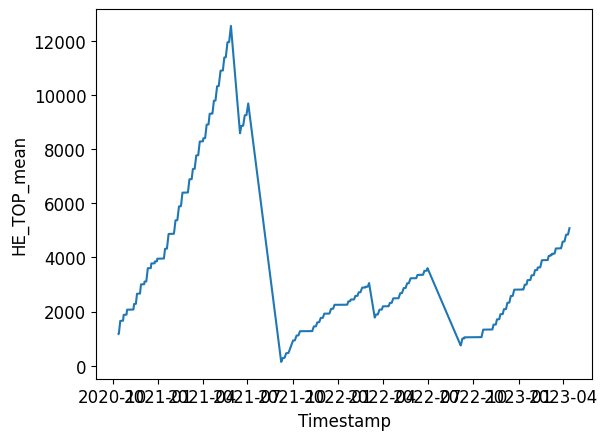

In [154]:
sns.lineplot(fe.df["HE_TOP_mean"])

<AxesSubplot: >

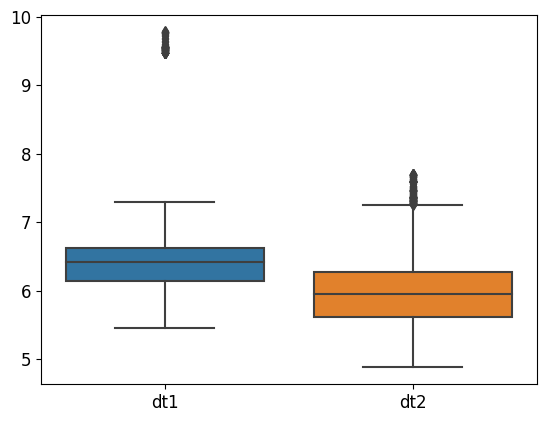

In [155]:
sns.boxplot(fe.df.loc[:, ["dt1", "dt2"]])

In [156]:
fe.df = fe.df[fe.df["P2"] >= 0.3] 

In [157]:
fe.df.to_excel("!important_input_files/rdy_for_stats_121020_210423_1h_freq.xlsx")